In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import calendar
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
CTA = pd.read_csv('CTA.csv')

In [3]:
CTA.head(2)

,Unnamed: 0,Unnamed: 0.1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,...,wealth_segment,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,0,0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,...,Mass Customer,N,Yes,10.0,66,984 Hoepker Court,3064,VIC,Australia,6
1,1,1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,...,Mass Customer,N,Yes,10.0,66,984 Hoepker Court,3064,VIC,Australia,6


In [4]:
CTA.drop('Unnamed: 0',axis=1,inplace=True)
CTA.drop('Unnamed: 0.1',axis=1,inplace=True)

In [5]:
CTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19765 non-null  int64  
 1   product_id                           19765 non-null  int64  
 2   customer_id                          19765 non-null  int64  
 3   transaction_date                     19765 non-null  object 
 4   online_order                         19765 non-null  bool   
 5   order_status                         19765 non-null  object 
 6   brand                                19765 non-null  object 
 7   product_line                         19765 non-null  object 
 8   product_class                        19765 non-null  object 
 9   product_size                         19765 non-null  object 
 10  list_price                           19765 non-null  float64
 11  standard_cost               

In [6]:
CTA['transaction_id'] = CTA['transaction_id'].astype(str)
CTA['product_id'] = CTA['product_id'].astype(str)
CTA['customer_id'] = CTA['customer_id'].astype(str)
CTA['transaction_year'] = CTA['transaction_year'].astype(str)
CTA['postcode'] = CTA['postcode'].astype(str)
CTA['product_first_sold_date'] = pd.to_datetime(CTA['product_first_sold_date'])
CTA['transaction_date'] = pd.to_datetime(CTA['transaction_date'])

In [7]:
CTA['Age'].min()

19

In [8]:
CTA['Age'].max()

90

In [9]:
# Divide age group
Age_group = pd.cut(CTA.Age, bins=[19,30,50,70,90], labels=['19-30','31-50','51-70','71-90'])
CTA.insert(26,'Age_Group',Age_group)
CTA.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,Age_Group,Age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,51-70,66,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,10.0,51-70,66,984 Hoepker Court,3064,VIC,Australia,6


In [10]:
CTA.describe()

,list_price,standard_cost,transaction_month,transaction_day,past_3_years_bike_related_purchases,tenure,Age,property_valuation
count,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000
mean,1107.879934,555.948145,6.519605,15.574399,48.779610,10.679979,43.862181,7.515204
std,582.850895,405.869990,3.450386,8.672631,28.607884,5.609530,12.461157,2.826196
min,12.010000,7.210000,1.000000,1.000000,0.000000,1.000000,19.000000,1.000000
25%,575.270000,215.140000,4.000000,8.000000,24.000000,6.000000,35.000000,6.000000
50%,1163.890000,507.580000,7.000000,16.000000,48.000000,10.657041,44.000000,8.000000
75%,1635.300000,795.100000,10.000000,23.000000,73.000000,15.000000,53.000000,10.000000
max,2091.470000,1759.850000,12.000000,31.000000,99.000000,22.000000,90.000000,12.000000


### Univariate Exploration

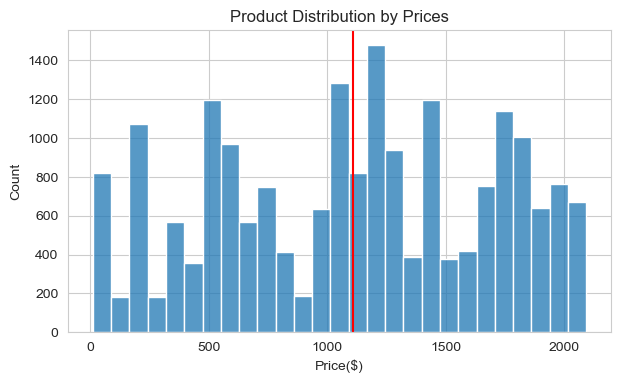

In [11]:
# product distribution by prices
plt.figure(figsize=(7,4),dpi=100)
sns.histplot(data=CTA,x='list_price')
plt.axvline(x=CTA['list_price'].mean(),color='red')
plt.title('Product Distribution by Prices')
plt.xlabel('Price($)')
plt.ylabel('Count')
plt.show()

In [12]:
CTA['list_price'].mean()

1107.879934227197

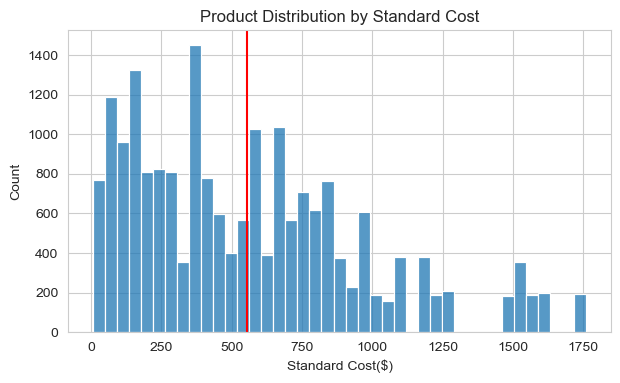

In [13]:
# product distribution by standard cost
plt.figure(figsize=(7,4),dpi=100)
sns.histplot(data=CTA,x='standard_cost')
plt.axvline(x=CTA['standard_cost'].mean(),color='red')
plt.title('Product Distribution by Standard Cost')
plt.xlabel('Standard Cost($)')
plt.ylabel('Count')
plt.show()

In [14]:
CTA['standard_cost'].mean()

555.9481452061829

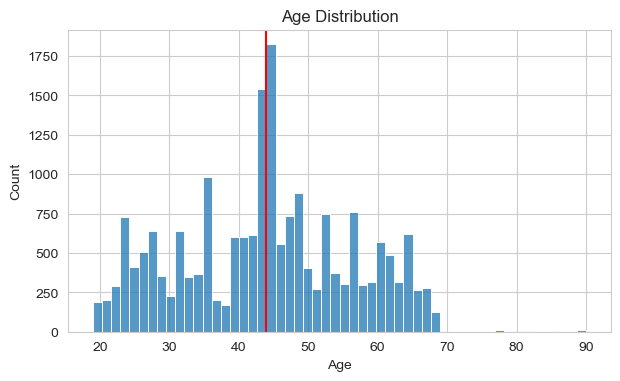

In [15]:
# Age distribution
plt.figure(figsize=(7,4),dpi=100)
sns.histplot(data=CTA,x='Age')
plt.axvline(x=CTA['Age'].mean(),color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [16]:
CTA['Age'].mean()

43.86218062231217

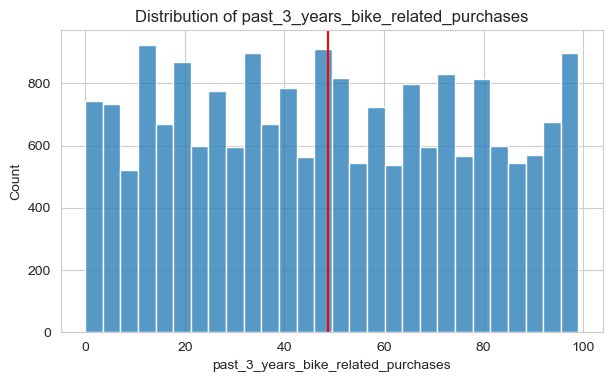

In [17]:
# Distribution of past_3_years_bike_related_purchases
plt.figure(figsize=(7,4),dpi=100)
sns.histplot(data=CTA,x='past_3_years_bike_related_purchases')
plt.axvline(x=CTA['past_3_years_bike_related_purchases'].mean(),color='red')
plt.title('Distribution of past_3_years_bike_related_purchases')
plt.xlabel('past_3_years_bike_related_purchases')
plt.ylabel('Count')
plt.show()

In [18]:
CTA['past_3_years_bike_related_purchases'].mean()

48.77961042246395

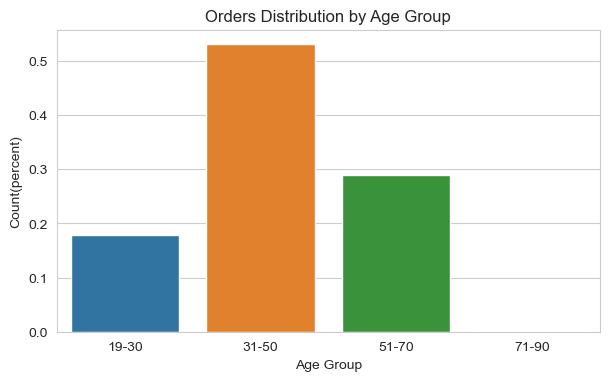

31-50    53.070624
51-70    28.986694
19-30    17.881269
71-90     0.061412
Name: Age_Group, dtype: float64


In [59]:
# Orders distribution by Age groups
plt.figure(figsize=(7,4),dpi=100)
counts = CTA['Age_Group'].value_counts(normalize=True)
sns.barplot(x=counts.index,y=counts.values)
plt.title('Orders Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count(percent)')
plt.show()
print(counts * 100)

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


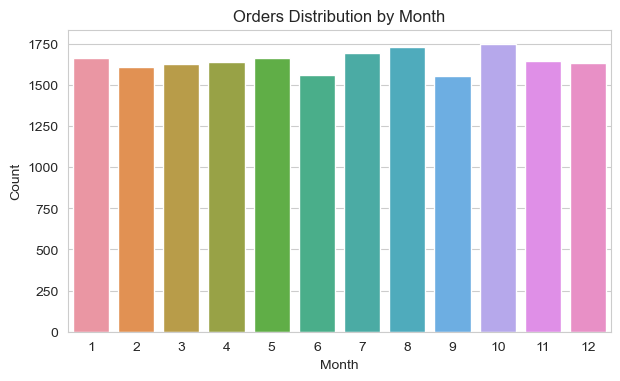

In [20]:
# Orders distribution by month
plt.figure(figsize=(7,4),dpi=100)
sns.countplot(CTA['transaction_month'])
plt.title("Orders Distribution by Month")
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

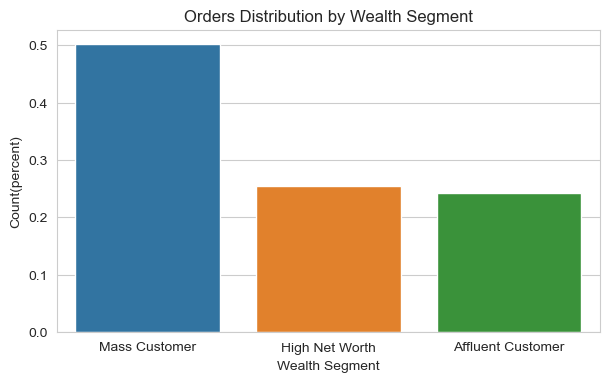

Mass Customer        50.204908
High Net Worth       25.499621
Affluent Customer    24.295472
Name: wealth_segment, dtype: float64


In [21]:
# Orders distribution by wealth segment
plt.figure(figsize=(7,4),dpi=100)
counts = CTA['wealth_segment'].value_counts(normalize=True)
sns.barplot(x=counts.index,y=counts.values)
plt.title('Orders Distribution by Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Count(percent)')
plt.show()
print(counts * 100)

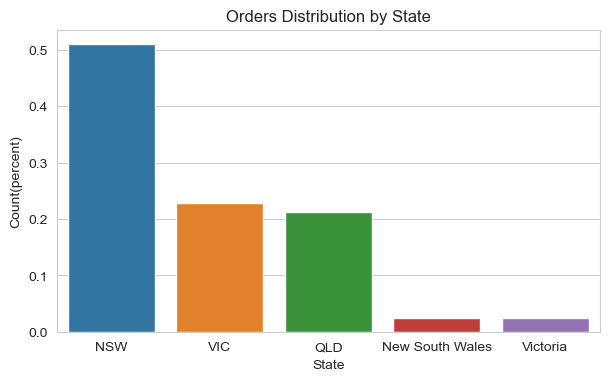

NSW                51.014419
VIC                22.813053
QLD                21.320516
New South Wales     2.428535
Victoria            2.423476
Name: state, dtype: float64


In [22]:
# Orders distribution by state
plt.figure(figsize=(7,4),dpi=100)
counts = CTA['state'].value_counts(normalize=True)
sns.barplot(x=counts.index,y=counts.values)
plt.title('Orders Distribution by State')
plt.xlabel('State')
plt.ylabel('Count(percent)')
plt.show()
print(counts * 100)

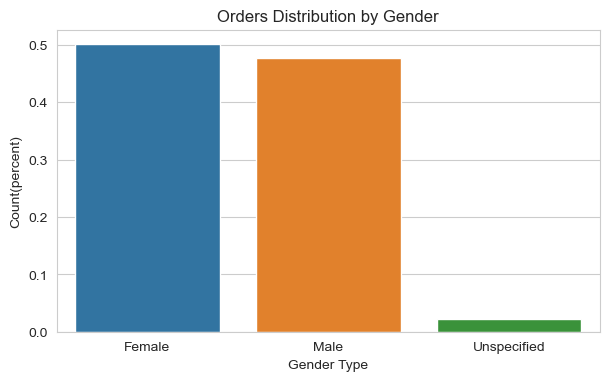

Female         50.129016
Male           47.654946
Unspecified     2.216038
Name: gender, dtype: float64


In [23]:
# Orders distribution by Gender
plt.figure(figsize=(7,4),dpi=100)
counts = CTA['gender'].value_counts(normalize=True)
sns.barplot(x=counts.index,y=counts.values)
plt.title('Orders Distribution by Gender')
plt.xlabel('Gender Type')
plt.ylabel('Count(percent)')
plt.show()
print(counts * 100)

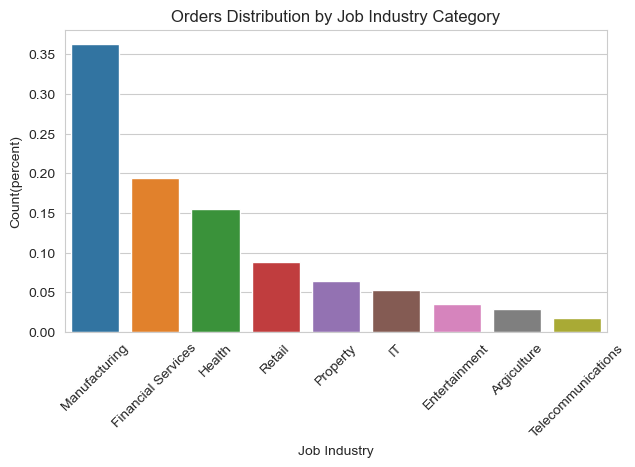

Manufacturing         36.266127
Financial Services    19.408045
Health                15.547685
Retail                 8.833797
Property               6.465975
IT                     5.322540
Entertainment          3.511257
Argiculture            2.863648
Telecommunications     1.780926
Name: job_industry_category, dtype: float64


In [24]:
# job_industry_category
plt.figure(figsize=(7,4),dpi=100)
counts = CTA['job_industry_category'].value_counts(normalize=True)
sns.barplot(x=counts.index,y=counts.values)
plt.title('Orders Distribution by Job Industry Category')
plt.xlabel('Job Industry')
plt.xticks(rotation=45)
plt.ylabel('Count(percent)')
plt.show()
print(counts * 100)

##### Removing outliers

In [25]:
CTA = CTA[CTA['Age'] <= 80]
CTA = CTA[CTA['standard_cost'] <= 1750]

### Bivariate Exploration

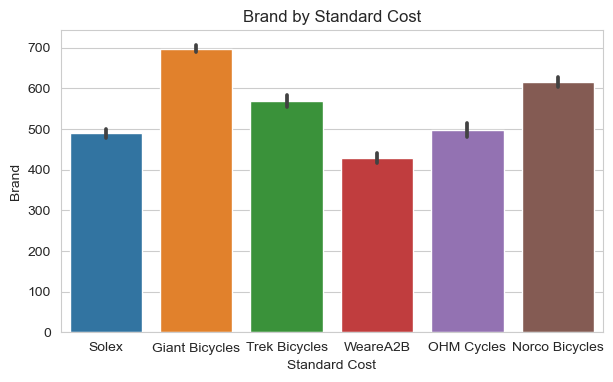

In [26]:
# Brand VS cost
plt.figure(figsize=(7,4),dpi=100)
sns.barplot(data=CTA,x='brand',y='standard_cost')
plt.xlabel('Standard Cost')
plt.ylabel('Brand')
plt.title('Brand by Standard Cost')
plt.show()

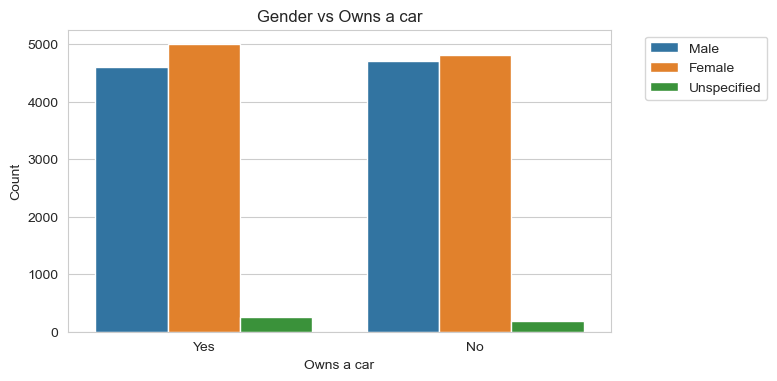

In [27]:
# Gender VS owns a car
plt.figure(figsize=(7,4),dpi=100)
sns.countplot(data=CTA,x='owns_car',hue='gender')
plt.xlabel('Owns a car')
plt.ylabel('Count')
plt.title('Gender vs Owns a car')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

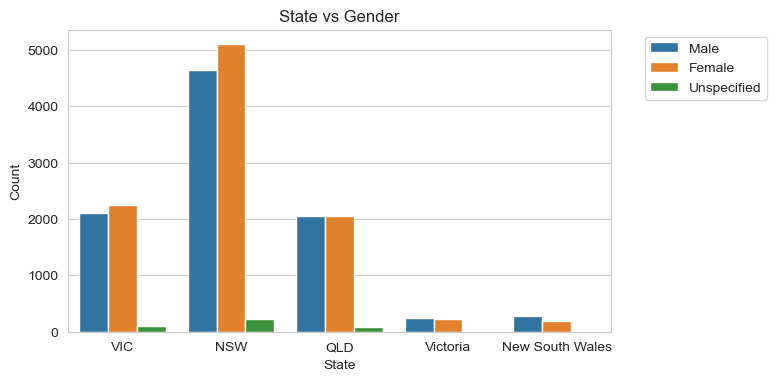

In [28]:
# State VS Gender
plt.figure(figsize=(7,4),dpi=100)
sns.countplot(data=CTA,x='state',hue='gender')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State vs Gender')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

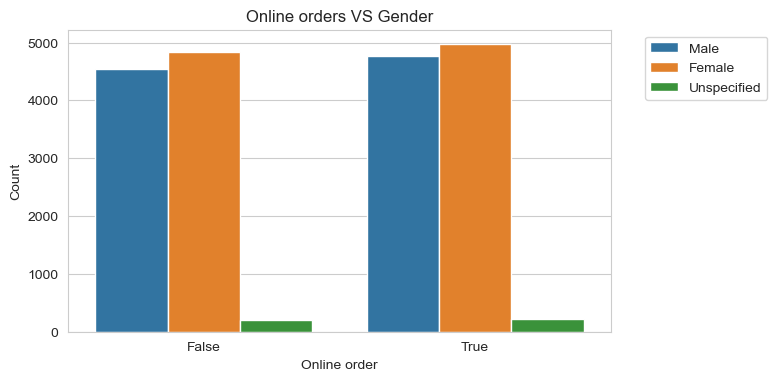

In [29]:
# Online orders vs Gender
plt.figure(figsize=(7,4),dpi=100)
sns.countplot(data=CTA,x='online_order',hue='gender')
plt.xlabel('Online order')
plt.ylabel('Count')
plt.title('Online orders VS Gender')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

### Multivariate Explortion

In [30]:
wealth_segment_revenue = CTA.groupby(['wealth_segment','gender'],as_index=False)['list_price'].sum()
wealth_segment_revenue

,wealth_segment,gender,list_price
0,Affluent Customer,Female,2565496.49
1,Affluent Customer,Male,2577954.24
2,Affluent Customer,Unspecified,91512.79
3,High Net Worth,Female,2694103.96
4,High Net Worth,Male,2637203.20
5,High Net Worth,Unspecified,123543.03
6,Mass Customer,Female,5470841.36
7,Mass Customer,Male,5048084.28
8,Mass Customer,Unspecified,286013.11


Text(0.5, 1.0, 'Wealth segment VS Profits VS Gender')

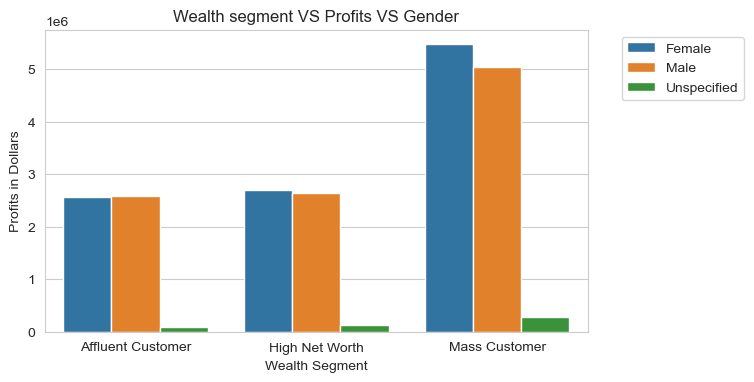

In [55]:
plt.figure(figsize = (7,4), dpi = 100)
sns.barplot(data=wealth_segment_revenue,x='wealth_segment',y='list_price',hue='gender')
plt.xlabel('Wealth Segment')
plt.ylabel('Profits in Dollars')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Wealth segment VS Profits VS Gender")

In [32]:
job_industry_cat_revenue=CTA.groupby(['job_industry_category','gender'],as_index=False)['list_price'].sum()
job_industry_cat_revenue.head()

,job_industry_category,gender,list_price
0,Argiculture,Female,333753.58
1,Argiculture,Male,260924.62
2,Entertainment,Female,350103.01
3,Entertainment,Male,407437.64
4,Financial Services,Female,2065502.29


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Argiculture'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'IT'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Property'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Telecommunications')])

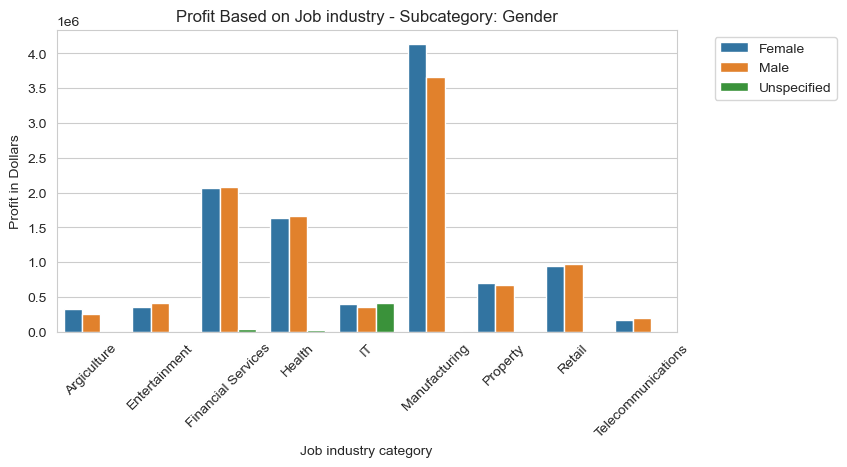

In [51]:
#job_industry_category vs list price vs gender
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(data=job_industry_cat_revenue,x='job_industry_category',y='list_price',hue='gender')
plt.xlabel('Job industry category')
plt.ylabel('Profit in Dollars')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Profit Based on Job industry - Subcategory: Gender")
plt.xticks(rotation=45)

No handles with labels found to put in legend.


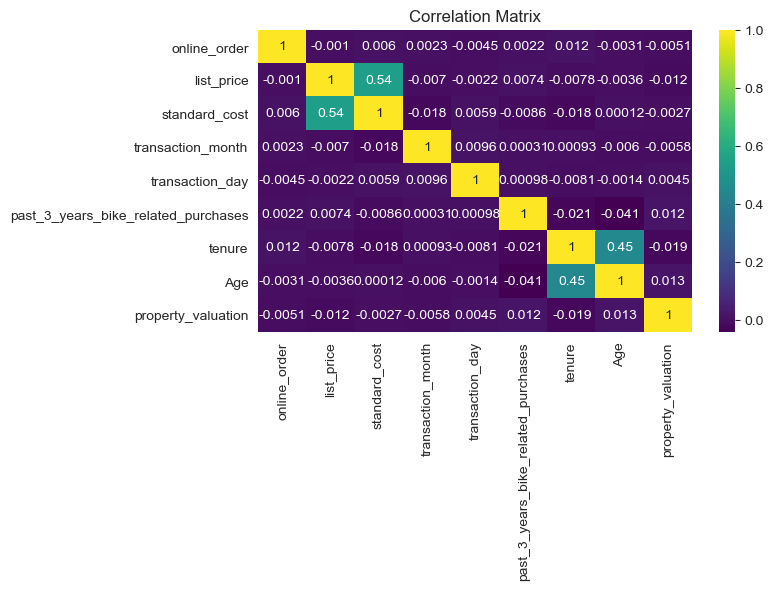

In [34]:
#correlation matrix
plt.figure(figsize = (7,4), dpi = 100);
sns.heatmap(CTA.corr(), cmap = "viridis", annot = True);
plt.title("Correlation Matrix");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.show();

### RFM Analysis

In [35]:
import datetime
end_date = max(CTA['transaction_date']) + pd.Timedelta(days=1)
CTA_rfm = CTA.groupby('customer_id').agg(
    recency=('transaction_date', lambda x: (end_date - x.max()).days),
    frequency=('transaction_id', 'count'),
    monetary=('list_price', 'sum')
).reset_index()
CTA_rfm.head()

,customer_id,recency,frequency,monetary
0,1,8,11,9084.45
1,100,12,2,2748.20
2,1000,1,9,10183.70
3,1001,43,7,6233.51
4,1002,156,4,5038.32


In [36]:
CTA_rfm.describe()

,recency,frequency,monetary
count,3483.000000,3483.000000,3483.000000
mean,62.660063,5.614126,6171.332891
std,58.582935,2.289839,2889.423320
min,1.000000,1.000000,60.340000
25%,18.500000,4.000000,4077.285000
50%,45.000000,5.000000,5897.310000
75%,87.000000,7.000000,7992.090000
max,360.000000,14.000000,19071.320000


In [37]:
quantiles = CTA_rfm.quantile(q=[0.25,0.5,0.75])

In [38]:
quantiles.to_dict()

{'recency': {0.25: 18.5, 0.5: 45.0, 0.75: 87.0},
 'frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'monetary': {0.25: 4077.285, 0.5: 5897.31, 0.75: 7992.09}}

In [39]:
# Recency
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [40]:
# Frequency and Monetary
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [41]:
CTA_rfm['R'] = CTA_rfm['recency'].apply(RClass,args=('recency',quantiles))
CTA_rfm['F'] = CTA_rfm['frequency'].apply(FMClass,args=('frequency',quantiles))
CTA_rfm['M'] = CTA_rfm['monetary'].apply(FMClass,args=('monetary',quantiles))

In [42]:
CTA_rfm['RFMClass'] = CTA_rfm['R'].map(str) + CTA_rfm['F'].map(str) + CTA_rfm['M'].map(str)
CTA_rfm['RFMscore'] = CTA_rfm[['R','F','M']].sum(axis=1)

In [43]:
CTA_rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMClass,RFMscore
0,1,8,11,9084.45,1,1,1,111,3
1,100,12,2,2748.20,1,4,4,144,9
2,1000,1,9,10183.70,1,1,1,111,3
3,1001,43,7,6233.51,2,2,2,222,6
4,1002,156,4,5038.32,4,4,3,443,11


<Figure size 800x400 with 0 Axes>

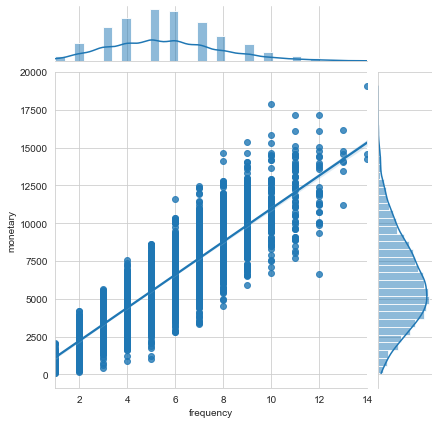

In [44]:
#checking for relation between Frequency and Monetary
plt.figure(figsize=(8,4),dpi=100);
sns.jointplot(x='frequency',y='monetary',data=CTA_rfm,kind='reg');

<Figure size 800x400 with 0 Axes>

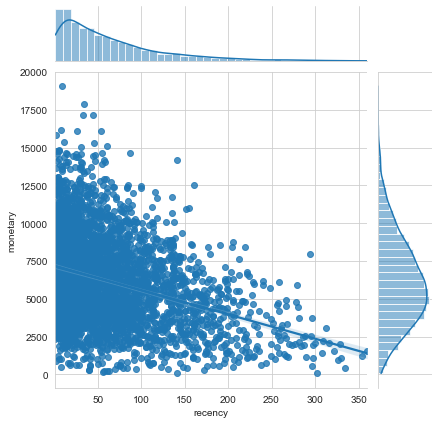

In [45]:
#checking for relation between Recency and Monetary
plt.figure(figsize=(8,4),dpi=100);
sns.jointplot(x='recency',y='monetary',data=CTA_rfm,kind='reg');

In [46]:
# Assigning Loyality level to each customer using qcut method which segments data as per number of quantiles decided
Loyality_level=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(CTA_rfm['RFMscore'],q=4,labels=Loyality_level)
CTA_rfm['RFM_loyalty_level']=score_cuts.values
CTA_rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,1,8,11,9084.45,1,1,1,111,3,Platinum
1,100,12,2,2748.20,1,4,4,144,9,Silver
2,1000,1,9,10183.70,1,1,1,111,3,Platinum
3,1001,43,7,6233.51,2,2,2,222,6,Gold
4,1002,156,4,5038.32,4,4,3,443,11,Bronze


In [47]:
CTA_rfm_allinfo=CTA.merge(CTA_rfm,on='customer_id',how='inner')

In [48]:
CTA_rfm_allinfo.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,6,76,3,1953.15,3,4,4,344,11,Bronze
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,6,76,3,1953.15,3,4,4,344,11,Bronze
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,...,6,76,3,1953.15,3,4,4,344,11,Bronze
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,5,21,7,7351.70,2,2,2,222,6,Gold
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,5,21,7,7351.70,2,2,2,222,6,Gold


In [49]:
CTA_rfm_allinfo.to_csv('CTA_rfm_allinfo.csv')

In [61]:
rfm_revenue=CTA_rfm_allinfo.groupby(['RFM_loyalty_level','RFMscore'],as_index=False)['list_price'].sum()

Text(0.5, 1.0, 'Customer Profile')

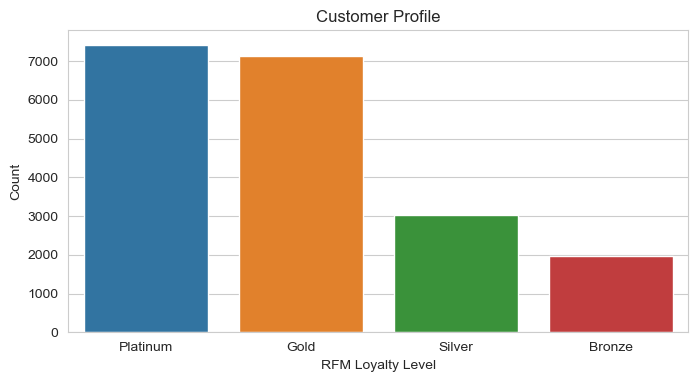

In [65]:
plt.figure(figsize = (8,4), dpi = 100)
sns.countplot(data=CTA_rfm_allinfo,x='RFM_loyalty_level')
plt.xlabel('RFM Loyalty Level')
plt.ylabel('Count')
plt.title('Customer Profile')